 # Feature Scaling and choosing learning rate (Multiple values)
 gradiant descent for linear regression with multiple variables

In [140]:
import numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt
import math
import copy
from amro import get_housing_data,gradient_descent
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc


Problem Statement : predcit housing price based on multiple features <br><br>
<img src="./Images/b17.png">


In [141]:
data= np.loadtxt("./data/houses.txt",delimiter=',',skiprows=1)
X_train = data[:,:4]
y_train = data[:,4]

"""now X_tain , y_train are loaded"""
X_features=np.array(["size(sqft)","bedrooms","floors","age"])
num_of_features=X_features.shape[0]

print(X_train.shape[1])



4


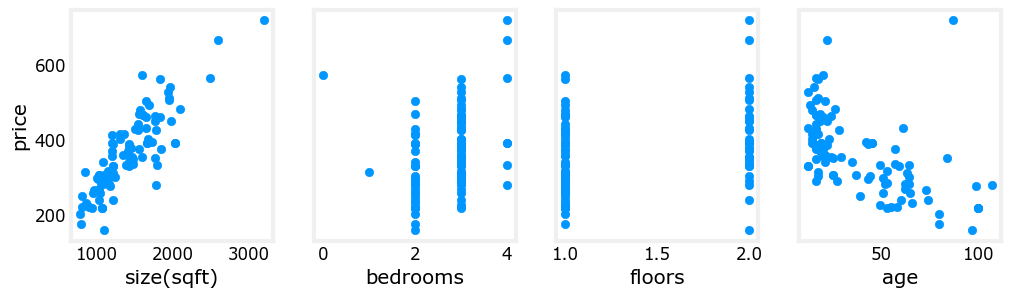

In [154]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3),sharey=True)
# 1 row  4 columns
"""
fig contains all subplots objects
ax contains axis of evey object
width =12 inch height = 3 inch
all subplots share the same y axis
"""

for i in range(num_of_features):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("price")


plt.show()

In [143]:
def compute_cost(X,y,w,b):
    cost = 0
    m = X.shape[0]
    for i in range(m):
        cost += (np.dot(w,X[i])+b-y[i])**2

    cost = cost / (2*m)
    return cost


In [144]:
def compute_gradient(X,y,w,b):
    d_dw = np.zeros(X.shape[1])
    d_db = 0
    m = X.shape[0]
    for i in range(m):
        err = (np.dot(w,X[i])+b)-y[i]
        # d_dw = d_dw + np.dot(err,X[i]) #***** no need dot product when multipying scalar * vector
        d_dw = d_dw + (err*X[i])
        d_db = d_db + err
    d_dw = d_dw/m
    d_db = d_db/m
    return d_dw,d_db

In [145]:
def gradient_descent(X,y,w_in,b_in,alpha,iteration):
    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)
    J_history={
        "cost":[],
        "params":[],
        "grads":[],
        "iter":[],
        "w0":[]
    }
    
    for i in range(iteration):
        dj_dw,dj_db =compute_gradient(X,y,w,b)
        w = w - (alpha*dj_dw) 
        b = b - (alpha*dj_db)
        J_history["cost"].append(compute_cost(X, y, w, b))
        J_history["params"].append([w,b])
        J_history["grads"].append([dj_dw,dj_db])
        J_history["iter"].append(i)
        J_history["w0"].append(w[0])
        if i % math.ceil(iteration/10) == 0:
            print(f"iteration {i:4d} w equals {w} and b equals {b} , cost equals {J_history['cost'][-1]}")
    return w,b,J_history

iteration    0 w equals [5.52e-02 1.01e-04 5.19e-05 1.24e-03] and b equals 3.631560808080808e-05 , cost equals 44231.26525678279
iteration    1 w equals [9.83e-02 1.79e-04 9.22e-05 2.20e-03] and b equals 6.480006336061475e-05 , cost equals 27646.11540274138
iteration    2 w equals [1.32e-01 2.40e-04 1.24e-04 2.93e-03] and b equals 8.716247966966151e-05 , cost equals 17510.224442092407
iteration    3 w equals [1.58e-01 2.88e-04 1.48e-04 3.48e-03] and b equals 0.00010473896596927484 , cost equals 11315.74324982964
iteration    4 w equals [1.79e-01 3.25e-04 1.67e-04 3.91e-03] and b equals 0.00011857403265116231 , cost equals 7530.0211455750805
iteration    5 w equals [1.95e-01 3.54e-04 1.81e-04 4.22e-03] and b equals 0.000129484231351289 , cost equals 5216.391690888988
iteration    6 w equals [2.08e-01 3.77e-04 1.92e-04 4.45e-03] and b equals 0.00013810790571787987 , cost equals 3802.419151959339
iteration    7 w equals [2.18e-01 3.94e-04 2.01e-04 4.62e-03] and b equals 0.0001449440843428

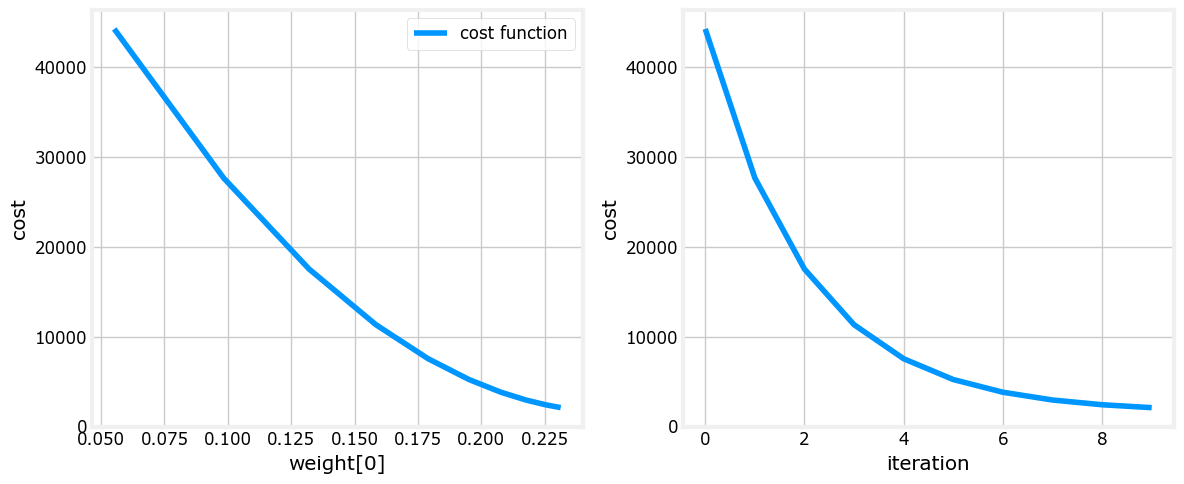

In [146]:
# ******IMPORTANT********     try alpha = 9.9e-7 which is big or 9e-7   and alpha = 1e-7 which is small
# ******IMPORTANT********     try iteration = 1000       and iteration = 10 
w,b,j_history = gradient_descent(X_train,y_train,(np.zeros(4)),0,alpha=1e-7,iteration=10)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(j_history['w0'],j_history['cost'],label="cost function")
plt.xlabel("weight[0]")
plt.ylabel("cost")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(j_history['iter'],j_history['cost'])
plt.xlabel("iteration")
plt.ylabel("cost")
plt.grid(True)

plt.tight_layout()
plt.show()



# If Alhpa is too high What  happen ?
Cost will increas with each iteration and you will not be able to reach minimum<br><br>
No convergence <br><br>
<img src = ./Images/b20.png width =700>

#   Feature Scaling   each features values around [1,-1]
Goal : is to make convergence more faster
<br><br>
if size of house ranges from 1000 to 3000 feet squared
while num of bedrooms ranges from 1 to 5 
then u need a very very large iteration to achieve convergence of the second feature
<br>
remember dj_dw = 1/m * sum of (eror) * X[Feature 1 , Feature 2 , ...]
<br>
so when feature 1 is too high and feature 2 has small scall then it will take huge time of convergence
<br><br>
<img src ="./Images/b21.png">


<img src = "./Images/b22.png">

In [147]:
w,b,j_hist = gradient_descent(X_train,y_train,(np.zeros(4)),0,alpha=1e-7,iteration=10)
#results without feature scalinng convergenc is too slow

iteration    0 w equals [5.52e-02 1.01e-04 5.19e-05 1.24e-03] and b equals 3.631560808080808e-05 , cost equals 44231.26525678279
iteration    1 w equals [9.83e-02 1.79e-04 9.22e-05 2.20e-03] and b equals 6.480006336061475e-05 , cost equals 27646.11540274138
iteration    2 w equals [1.32e-01 2.40e-04 1.24e-04 2.93e-03] and b equals 8.716247966966151e-05 , cost equals 17510.224442092407
iteration    3 w equals [1.58e-01 2.88e-04 1.48e-04 3.48e-03] and b equals 0.00010473896596927484 , cost equals 11315.74324982964
iteration    4 w equals [1.79e-01 3.25e-04 1.67e-04 3.91e-03] and b equals 0.00011857403265116231 , cost equals 7530.0211455750805
iteration    5 w equals [1.95e-01 3.54e-04 1.81e-04 4.22e-03] and b equals 0.000129484231351289 , cost equals 5216.391690888988
iteration    6 w equals [2.08e-01 3.77e-04 1.92e-04 4.45e-03] and b equals 0.00013810790571787987 , cost equals 3802.419151959339
iteration    7 w equals [2.18e-01 3.94e-04 2.01e-04 4.62e-03] and b equals 0.0001449440843428

In [148]:
def z_score_normalization(X):
    mu = np.mean(X,axis=0)   # axis = 0 then work for all columns
    sigma = np.std(X,axis=0)
    X_norm = (X-mu)/sigma 
    return mu,sigma,X_norm

   # now lets normalizae our original data
X_mu,X_sigma,X_norm = z_score_normalization(X_train)

w_norm,b_norm,hist_norm = gradient_descent(X_norm,y_train,(np.zeros(4)),0,alpha=1e-1,iteration=1000)
     



iteration    0 w equals [ 8.91  2.95  3.28 -5.96] and b equals 36.31560808080808 , cost equals 57617.03252196659
iteration  100 w equals [107.92 -19.95 -31.2  -38.48] and b equals 363.1473994679121 , cost equals 221.08562664047187
iteration  200 w equals [110.47 -21.22 -32.66 -37.99] and b equals 363.1560805774923 , cost equals 219.20890028987432
iteration  300 w equals [110.56 -21.27 -32.71 -37.97] and b equals 363.15608080807465 , cost equals 219.20682667671008
iteration  400 w equals [110.56 -21.27 -32.71 -37.97] and b equals 363.15608080808056 , cost equals 219.20682438502706
iteration  500 w equals [110.56 -21.27 -32.71 -37.97] and b equals 363.15608080808056 , cost equals 219.20682438249426
iteration  600 w equals [110.56 -21.27 -32.71 -37.97] and b equals 363.15608080808056 , cost equals 219.20682438249162
iteration  700 w equals [110.56 -21.27 -32.71 -37.97] and b equals 363.15608080808056 , cost equals 219.20682438249145
iteration  800 w equals [110.56 -21.27 -32.71 -37.97] an

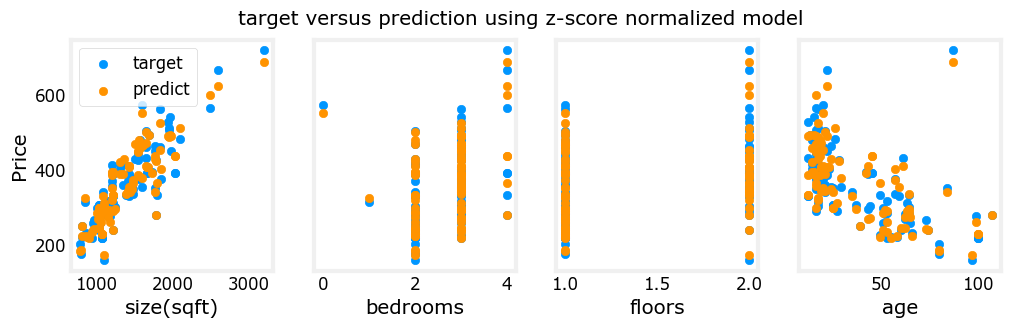

In [149]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [150]:
# First, normalize out example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

[-0.53  0.43 -0.79  0.06]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709
